In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import bootcampviztools as bvt
import warnings 
warnings.filterwarnings('ignore')

df_vg = pd.read_csv("../data/Sales_Videogames_90-24_(Clean).csv")

In [2]:
# Se transforman los valores de ambas columnas de fechas, a un datetime
df_vg["fecha_lanzamiento"] = pd.to_datetime(df_vg["fecha_lanzamiento"])
df_vg["ultima_actualizacion"] = pd.to_datetime(df_vg["ultima_actualizacion"])

In [3]:
df_vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60230 entries, 0 to 60229
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   titulo                  60230 non-null  object        
 1   consola                 60230 non-null  object        
 2   genero                  60230 non-null  object        
 3   editor                  60230 non-null  object        
 4   desarrollador           60230 non-null  object        
 5   puntuacion_critica      6648 non-null   float64       
 6   ventas_totales          60230 non-null  int64         
 7   ventas_na               60230 non-null  int64         
 8   ventas_japon            60230 non-null  int64         
 9   ventas_europa           60230 non-null  int64         
 10  ventas_otros            60230 non-null  int64         
 11  fecha_lanzamiento       60230 non-null  datetime64[ns]
 12  ultima_actualizacion    60230 non-null  dateti

In [4]:
df_vg.groupby('genero')['ventas_totales'].sum()


genero
Acción                     1580919994
Aventura                    325329998
Deportes y Carreras        1699339990
Estrategia y Simulación     536079996
Misceláneos/Varios          557719998
Plataformas y Música        385329999
RPG y MMO                   438479998
Shooter                     967989994
Name: ventas_totales, dtype: int64

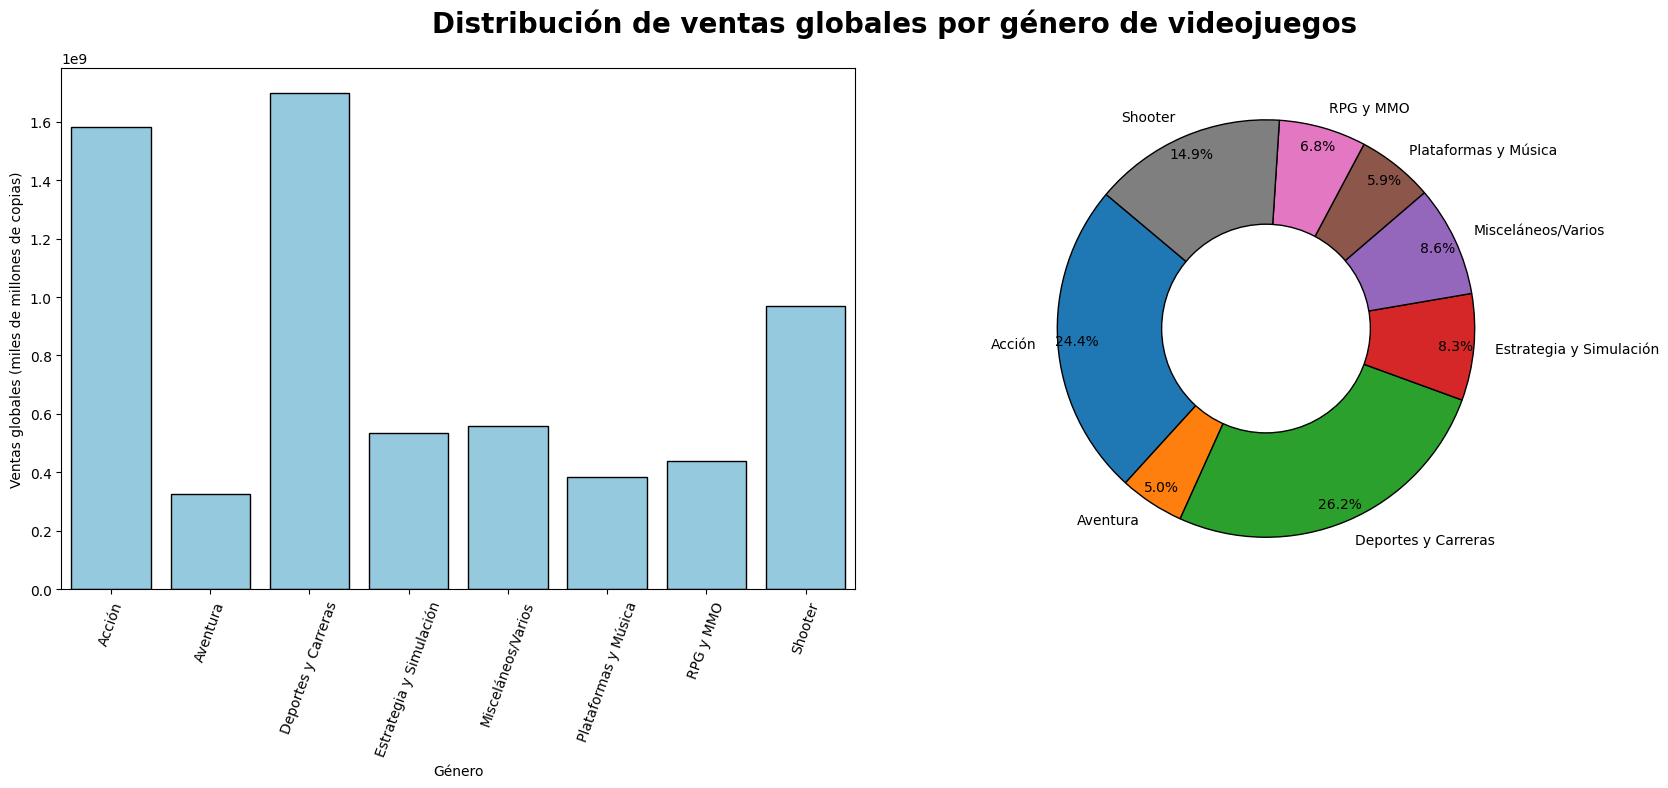

In [14]:
# Crear subplots para los gráficos
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Agrupar por género y sumar las ventas globales
ventas_por_genero = df_vg.groupby('genero')['ventas_totales'].sum().reset_index()

# Gráfico de barras
sns.barplot(x="genero", 
            y=ventas_por_genero["ventas_totales"], 
            data=ventas_por_genero, 
            errorbar=None, 
            color="skyblue",
            edgecolor="black",
            ax=axs[0])

# Personalización del gráfico de barras
axs[0].set_xticklabels(ventas_por_genero["genero"], rotation=70)
axs[0].set_xlabel('Género')
axs[0].set_ylabel('Ventas globales (miles de millones de copias)')

# Gráfico de pastel
wedges, texts, autotexts = axs[1].pie(
    ventas_por_genero["ventas_totales"], 
    labels=ventas_por_genero["genero"], 
    autopct='%1.1f%%',           # Mostrar porcentajes con 1 decimal
    startangle=140,              # Ángulo de inicio
    wedgeprops={'edgecolor': 'black'},  # Bordes de las secciones
    pctdistance=0.91             # Ajustar posición de los porcentajes
)

# Añadir un círculo blanco al centro para convertir el gráfico en dona
centre_circle = plt.Circle((0, 0), 0.50, fc='white', edgecolor='black')
axs[1].add_artist(centre_circle)

plt.suptitle("Distribución de ventas globales por género de videojuegos", fontsize = 20,fontweight='bold')

# Ajustar layout para evitar solapamientos

plt.tight_layout()
plt.show()

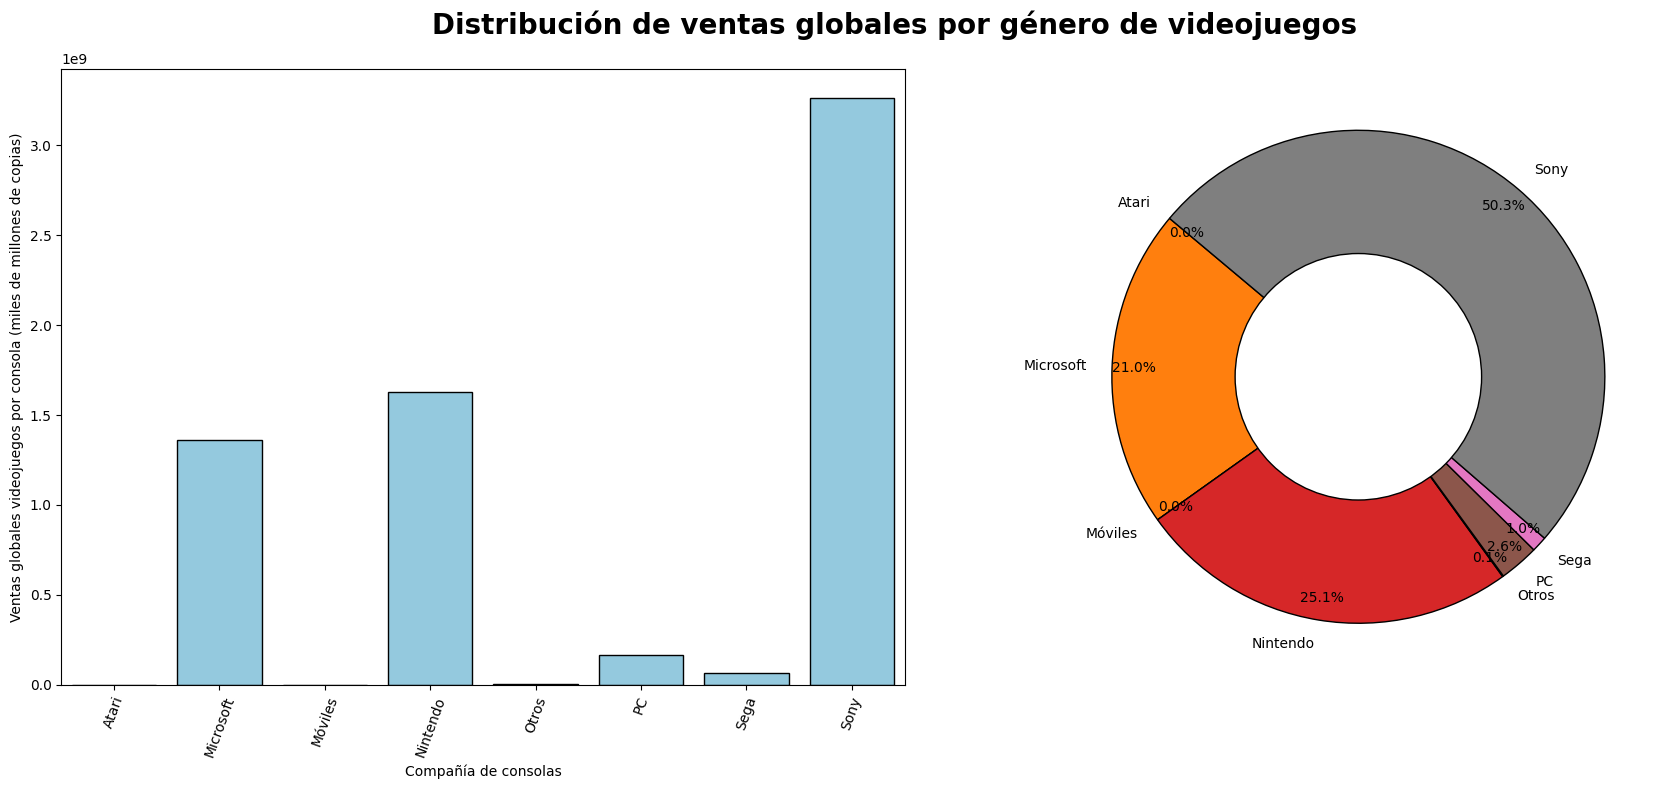

In [6]:
# Agrupar por empresa de consola y sumar las ventas globales
ventas_por_empresa = df_vg.groupby('empresa_consola')['ventas_totales'].sum().reset_index()

# Crear subplots para los gráficos
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico de barras
sns.barplot(x="empresa_consola", 
            y=ventas_por_empresa["ventas_totales"], 
            data=ventas_por_empresa, 
            errorbar=None, 
            color="skyblue",
            edgecolor="black",
            ax=axs[0])

# Personalización del gráfico de barras
axs[0].set_xticklabels(ventas_por_empresa["empresa_consola"], rotation=70)
axs[0].set_xlabel('Compañía de consolas')
axs[0].set_ylabel('Ventas globales videojuegos por consola (miles de millones de copias)')

# Gráfico de pastel
wedges, texts, autotexts = axs[1].pie(
    ventas_por_empresa["ventas_totales"], 
    labels=ventas_por_empresa["empresa_consola"], 
    autopct='%1.1f%%',           # Mostrar porcentajes con 1 decimal
    startangle=140,              # Ángulo de inicio
    wedgeprops={'edgecolor': 'black'},  # Bordes de las secciones
    pctdistance=0.91             # Ajustar posición de los porcentajes
)

# Añadir un círculo blanco al centro para convertir el gráfico en dona
centre_circle = plt.Circle((0, 0), 0.50, fc='white', edgecolor='black')
axs[1].add_artist(centre_circle)


plt.suptitle("Distribución de ventas globales por género de videojuegos", fontsize = 20, fontweight='bold')

# Ajustar layout para evitar solapamientos
plt.tight_layout()
plt.show()


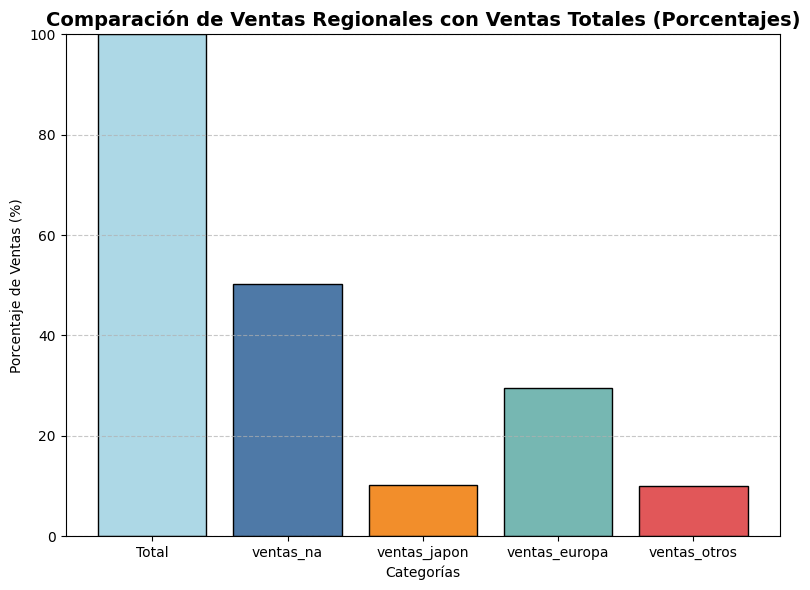

In [7]:
# Seleccionar columnas relevantes y sumar las ventas regionales
region_sales_col = ['ventas_na', 'ventas_japon', 'ventas_europa', 'ventas_otros']
ventas_por_region = df_vg[region_sales_col].sum()

# Calcular las ventas totales
ventas_totales = df_vg['ventas_totales'].sum()

# Crear un nuevo DataFrame con porcentajes
ventas_por_region_porc = (ventas_por_region / ventas_totales) * 100
ventas_totales_porc = ventas_totales / ventas_totales * 100  # Total siempre será 100%

# Crear un gráfico de barras para ventas regionales y totales en porcentaje
plt.figure(figsize=(8, 6))
plt.bar('Total', ventas_totales_porc, color='lightblue', label='Ventas Totales', edgecolor='black')
plt.bar(ventas_por_region_porc.index, ventas_por_region_porc, 
        color=['#4E79A7', '#F28E2B', '#76B7B2', '#E15759'], edgecolor='black')

# Personalización del gráfico
plt.title('Comparación de Ventas Regionales con Ventas Totales (Porcentajes)', fontsize=14, fontweight='bold')
plt.ylabel('Porcentaje de Ventas (%)')
plt.xlabel('Categorías')

plt.ylim(0, 100)  # Limitar el eje Y al 100%

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



In [8]:
ventas_regionales = df_vg[['ventas_na', 'ventas_japon', 'ventas_europa', 'ventas_otros']].sum()

# Crear el DataFrame con los datos en porcentaje
df_regional = pd.DataFrame({
    'Categoría': ['Total', 'ventas_na', 'ventas_japon', 'ventas_europa', 'ventas_otros'],
    'Porcentaje': [100, 
                   (ventas_regionales['ventas_na'] / ventas_totales) * 100,
                   (ventas_regionales['ventas_japon'] / ventas_totales) * 100,
                   (ventas_regionales['ventas_europa'] / ventas_totales) * 100,
                   (ventas_regionales['ventas_otros'] / ventas_totales) * 100]
})

# Redondear a 1 decimal
df_regional['Porcentaje'] = df_regional['Porcentaje'].round(1)

# Mostrar el DataFrame resultante
df_regional

,Categoría,Porcentaje
0,Total,100.0
1,ventas_na,50.3
2,ventas_japon,10.2
3,ventas_europa,29.4
4,ventas_otros,10.0


In [9]:
# # Guardar el dataset limpio en caso de que queramos hacer un dashboard
# df_regional.to_csv(r"C:\Users\rafae\Documents\GitHub\EDA\src\data\Sales_Videogames_90-24_datos_para_grafico_barras_Ventas_por_region.csv", index=False)

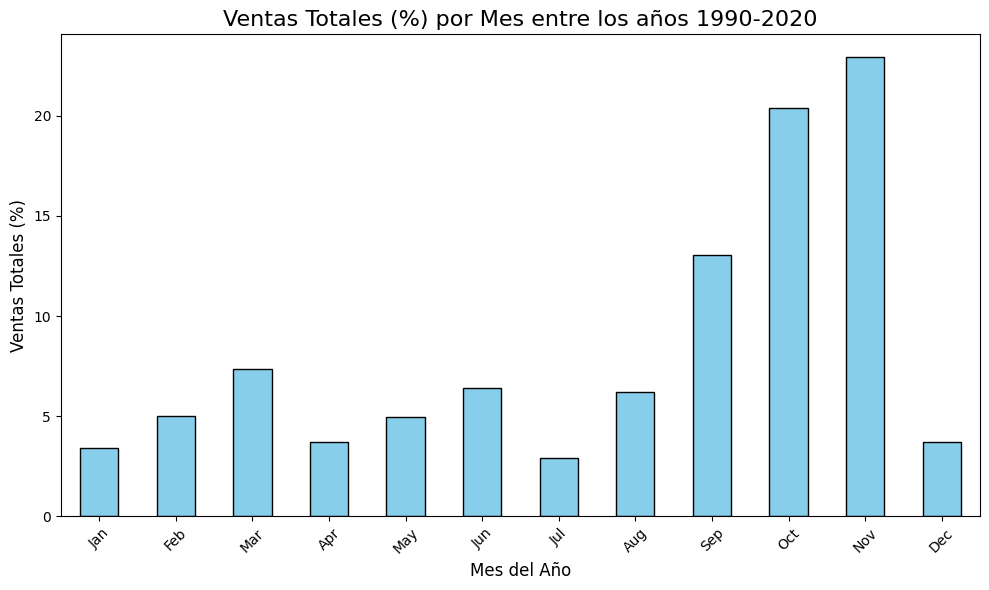

In [10]:
# Extraer el mes de la fecha de lanzamiento
df_vg['mes'] = df_vg['fecha_lanzamiento'].dt.month  # Extraer el mes

# Agrupar por mes, sumando las ventas totales
ventas_por_mes = df_vg.groupby('mes')['ventas_totales'].sum()

# Calcular el porcentaje de ventas por mes
ventas_por_mes_porcentaje = round((ventas_por_mes / ventas_por_mes.sum()) * 100, 2)

# Reemplazar los números de los meses con los nombres
month_names = {i: calendar.month_abbr[i] for i in range(1, 13)}
ventas_por_mes_porcentaje.index = ventas_por_mes_porcentaje.index.map(month_names)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ventas_por_mes_porcentaje.plot(kind='bar', color='skyblue', edgecolor='black')

# Personalización del gráfico
plt.title("Ventas Totales (%) por Mes entre los años 1990-2020", fontsize=16)
plt.xlabel("Mes del Año", fontsize=12)
plt.ylabel("Ventas Totales (%)", fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor legibilidad
plt.tight_layout()
plt.show()


In [11]:
# Extraer el mes de la fecha de lanzamiento
df_vg['mes'] = df_vg['fecha_lanzamiento'].dt.month  # Extraer el mes

# Agrupar por mes, sumando las ventas totales
ventas_por_mes = df_vg.groupby('mes')['ventas_totales'].sum()

# Calcular el porcentaje de ventas por mes
ventas_por_mes_porcentaje = round((ventas_por_mes / ventas_por_mes.sum()) * 100, 2)

# Reemplazar los números de los meses con los nombres
month_names = {i: calendar.month_abbr[i] for i in range(1, 13)}
ventas_por_mes_porcentaje.index = ventas_por_mes_porcentaje.index.map(month_names)

ventas_por_mes_porcentaje = pd.DataFrame(ventas_por_mes_porcentaje).reset_index()
ventas_por_mes_porcentaje

,mes,ventas_totales
0,Jan,3.43
1,Feb,5.03
2,Mar,7.36
3,Apr,3.70
4,May,4.96
5,Jun,6.39
6,Jul,2.93
7,Aug,6.21
8,Sep,13.02
9,Oct,20.36


In [12]:
# # Guardar el dataset limpio en caso de que queramos hacer un dashboard
# ventas_por_mes_porcentaje.to_csv(r"C:\Users\rafae\Documents\GitHub\EDA\src\data\Sales_Videogames_90-24_datos_para_grafico_barras_Ventas_por_mes.csv", index=False)